In [1288]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1289]:
leads= pd.read_csv("leads.csv")

In [1290]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1291]:
# we can rid off prospect ID as it's neccessary featire for our model
leads = leads.drop('Prospect ID', axis=1)

In [1292]:
#we can ridd off Lead Number column as this is also not added information in iur analysis
leads=leads.drop('Lead Number', axis=1)

In [1293]:
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


#### We can see above that some columns having values as "Select". we will treat these values

In [1294]:
#now let's check some basic stats
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1295]:
leads.shape

(9240, 35)

In [1296]:
# we have around 9240 rows and 35 columns

#### Check and treat NaN values

In [1297]:
# lets check NA values in each columns
#find out %age of NaN values in every columns
list= []
for i in leads.columns:
    if leads[i].isna().sum() != 0:
        list.append(i + "--" + str(round((leads[i].isna().sum()/9240)*100,2))+ "%" )       
list

['Lead Source--0.39%',
 'TotalVisits--1.48%',
 'Page Views Per Visit--1.48%',
 'Last Activity--1.11%',
 'Country--26.63%',
 'Specialization--15.56%',
 'How did you hear about X Education--23.89%',
 'What is your current occupation--29.11%',
 'What matters most to you in choosing a course--29.32%',
 'Tags--36.29%',
 'Lead Quality--51.59%',
 'Lead Profile--29.32%',
 'City--15.37%',
 'Asymmetrique Activity Index--45.65%',
 'Asymmetrique Profile Index--45.65%',
 'Asymmetrique Activity Score--45.65%',
 'Asymmetrique Profile Score--45.65%']

In [1298]:
#lets drop Asymmetrique Activity Index, Asymmetrique Activity Score,
#Asymmetrique Profile Index, Asymmetrique Profile Score as it contains more than 40% missing values
#I didn't remove Lead Quality columns as it looks like an important feature right now 

leads=leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index',
                  'Asymmetrique Profile Score'], axis=1)

In [1299]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1300]:
# we can see Lead Source, TotalVisits, Page Views Per Visit, Last Activity having very less NaN values so we can drop Null vlaues
#directly as we have huge data fro analysis
leads.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'], inplace= True)

In [1301]:
leads.isna().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1302]:
leads['Lead Quality'].value_counts()

Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [1303]:
#Fill NaN values with "Might be" as it's most frequent value of Lead Quality feature
leads['Lead Quality'].fillna(value='Might be', inplace=True)

In [1304]:
#check value_counts after imputation
leads['Lead Quality'].value_counts()

Might be             6239
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [1305]:
#let's check NaN values in Country columns
leads['Country'].isna().sum()

2296

In [1306]:
leads['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1307]:
leads['Country'].mode()

0    India
Name: Country, dtype: object

In [1308]:
#let's impute NaN values with India as it's most frequent country in the column
leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)

In [1309]:
#validate imputation
leads['Country'].isna().sum()

0

In [1310]:
#Check Tags columns
leads['Tags'].value_counts()

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [1311]:
#lets impute NaN values with 'Will revert after reading the email' as it's most frequent value 
leads.loc[leads['Tags'].isna(),'Tags']='Will revert after reading the email'

In [1312]:
#Validate imputation
leads['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [1313]:
#now  check 'What matters most to you in choosing a course' columns
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1314]:
leads['What matters most to you in choosing a course'].mode()[0]
#impute NaN with 'Better Career Prospects'
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()[0], inplace=True)

In [1315]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1316]:
#lets check 'What is your current occupation' columns
leads['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [1317]:
#lets impute NaN values with 'Unemployed'
leads['What is your current occupation'].fillna('Unemployed', inplace=True)

In [1318]:
leads['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

#### Let's analyze and impute values for columns which having both "Select" and NaN values 

In [1319]:
#lets check How did you hear about X Education columns
leads['How did you hear about X Education'].value_counts()

Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [1320]:
# we can see it contains select values lets impute them with NaN values
leads.loc[leads['How did you hear about X Education']=='Select','How did you hear about X Education']=np.NaN

In [1321]:
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            347
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              66
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [1322]:
#now checl %age of NaN values
(leads['How did you hear about X Education'].isna().sum()/len(leads))*100

78.09124972448754

In [1323]:
# now we have 78%age NaN values it's better to drop this columns
leads=leads.drop(['How did you hear about X Education'], axis=1)

In [1324]:
#now check specialization
leads['Specialization'].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1325]:
#we can see it contains few values as 'Select'
leads.loc[leads['Specialization']=='Select','Specialization'] = np.NaN

In [1326]:
# we have around 3282 value. User might not be sure at the time of form submission about specailization. let's impute Nan
#value with others
leads['Specialization'].fillna('Others', inplace=True)

In [1327]:
leads.isna().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [1328]:
## check city column now
leads['City'].value_counts()

Mumbai                         3177
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [1329]:
#check NaN Values in City
leads['City'].isna().sum()

1419

In [1330]:
#we can see there are some 'Select' values. We assume that there might be chance that user didn't
#put any values or forget to put any value so we impute select values with NaN values
leads.loc[leads['City']=='Select', 'City']= np.NaN

In [1331]:
#Check NaN values after imputation
leads['City'].isna().sum()

3575

In [1332]:
# let's impute "Mumbai" as it's most frequent city
leads['City'].fillna('Mumbai', inplace= True)

In [1333]:
leads['City'].value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [1334]:
leads.isna().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [1335]:
#now check Lead Profile
leads['Lead Profile'].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1336]:
#we have some values as Select then we need to change those values as NaN
leads.loc[leads['Lead Profile']=='Select', 'Lead Profile']=np.NaN

In [1337]:
leads['Lead Profile'].value_counts()

Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1338]:
leads['Lead Profile'].isna().sum()

6757

In [1339]:
# check percentage of NaN values
(leads['Lead Profile'].isna().sum()/len(leads))*100

74.46550584086401

In [1340]:
#we can see we have 74% values as NaN it's better to drop Lead Profile column
leads= leads.drop(['Lead Profile'], axis=1)

In [1341]:
leads.isna().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [1342]:
### Univariate Analysis

In [1343]:
leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [1344]:
#check X Education Forums column
leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [1345]:
# As we can see above, X Education Forums column has almost all values as "No". 
#this column won't added any information to our analysis, will drop it

In [1346]:
#Check Newspaper Article column
leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [1347]:
# this column also have almost all values as "No". This column should be dropped as well

In [1348]:
#Check Newspaper column
leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [1349]:
# Newspaper columns also have almost all values as "No". this column should also be dropped

In [1350]:
# check Digital Advertisement
leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [1351]:
# Digital Advertisement column also have almost all values as "No". this column should also be dropped

In [1352]:
leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [1353]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [1354]:
leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [1355]:
leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [1356]:
leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

#### As we can see above,'Magazine', 'X Education Forums', 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'
#### 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
#### all these columns are highly skewed(having almost same values) so, it won't added any information to our analysis
#### We will drop all these columns in one go

In [1357]:
l=['Magazine', 'X Education Forums', 'Newspaper Article', 'Newspaper', 'Digital Advertisement',
   'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
   'Get updates on DM Content', 'I agree to pay the amount through cheque']

In [1358]:
leads= leads.drop(l, axis=1)

In [1359]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1360]:
### checing outliers

In [1361]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,Ringing,Might be,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [1362]:
## Checking outliers

In [1363]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


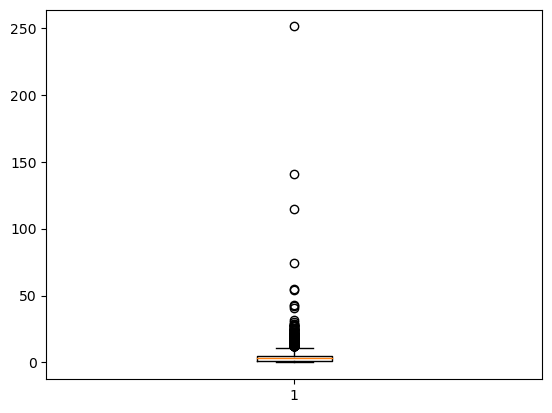

In [1364]:
plt.boxplot([leads.TotalVisits])
plt.show()

In [1368]:
## we can see there are some outliers in totalvisit columns
leads[leads['TotalVisits']>35]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
1160,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,India,Marketing Management,Unemployed,Better Career Prospects,No,Not doing further education,Not Sure,Thane & Outskirts,No,Email Opened
2190,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,India,IT Projects Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Other Cities,Yes,Modified
2322,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,India,Human Resource Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,Yes,Page Visited on Website
5283,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,Not doing further education,Not Sure,Thane & Outskirts,No,Page Visited on Website
5530,Landing Page Submission,Direct Traffic,Yes,No,0,41.0,311,1.14,Page Visited on Website,India,Retail Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Other Cities,No,Page Visited on Website
5538,Landing Page Submission,Referral Sites,No,No,0,54.0,1280,4.50,SMS Sent,India,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,SMS Sent
5608,Landing Page Submission,Referral Sites,Yes,No,0,115.0,187,8.21,Page Visited on Website,India,Rural and Agribusiness,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Page Visited on Website
6102,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48,Page Visited on Website,India,Supply Chain Management,Unemployed,Better Career Prospects,No,Interested in other courses,Not Sure,Mumbai,Yes,Page Visited on Website
8230,Landing Page Submission,Direct Traffic,Yes,No,0,42.0,1148,3.82,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,Not doing further education,Worst,Thane & Outskirts,No,Modified


In [1366]:
## lets analyze more by checking qunatiles

In [1367]:
leads['TotalVisits'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [1369]:
## we can see there is sharp spike after 99%. we will cap all values to 95% value i.e 10 which are having values greater than 17
leads['TotalVisits']= leads['TotalVisits'].apply(lambda x: 35 if x>35 else x)

In [1370]:
# validate
leads['TotalVisits'].describe()

count    9074.000000
mean        3.400816
std         3.573128
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        35.000000
Name: TotalVisits, dtype: float64

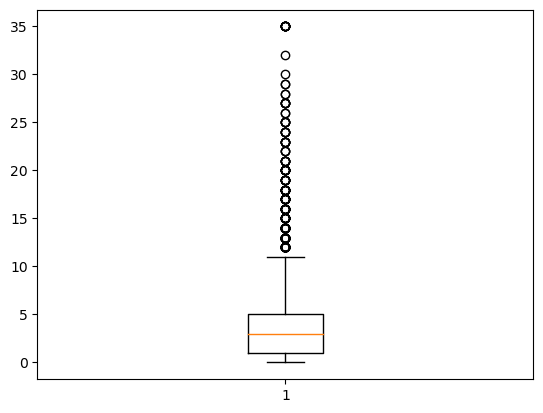

In [1371]:
plt.boxplot([leads.TotalVisits])
plt.show()

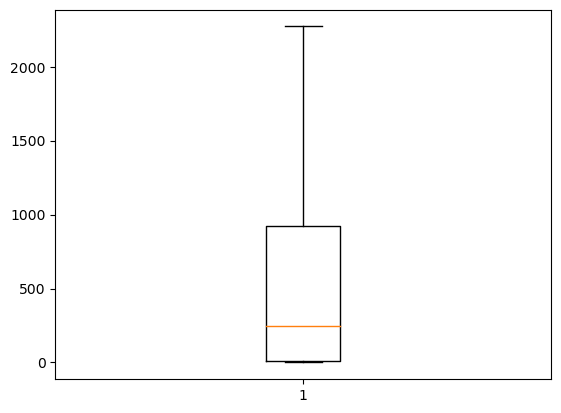

In [1190]:
# now check Total Time Spent on Website column
plt.boxplot([leads['Total Time Spent on Website']])
plt.show()

In [1192]:
## we can see above there is no potential outliers in Total Time Spent on Website column

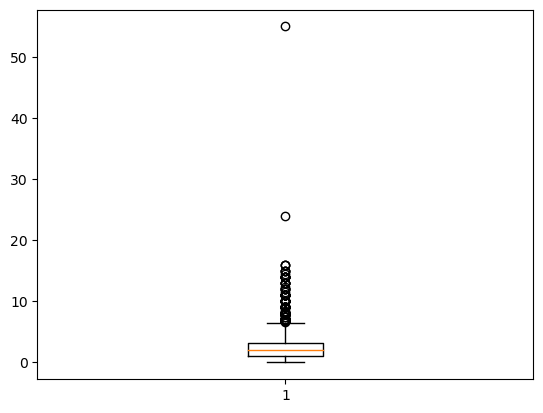

In [1193]:
#let's check Page Views Per Visit column
plt.boxplot([leads['Page Views Per Visit']])
plt.show()

In [1194]:
### looks like data is coninuous but there are few outliers. let's analyze 
leads['Page Views Per Visit'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1200]:
## we can see there is a shape spike after 95%. let's check how may records having more than 15 value
leads[leads['Page Views Per Visit']>15]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
125,API,Referral Sites,No,No,0,10.0,53,16.0,Olark Chat Conversation,India,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Modified
2190,Landing Page Submission,Direct Traffic,Yes,No,0,10.0,297,55.0,Page Visited on Website,India,IT Projects Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Other Cities,Yes,Modified
5164,Landing Page Submission,Direct Traffic,Yes,No,0,10.0,103,16.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,Yes,Modified
5495,Landing Page Submission,Google,Yes,No,0,10.0,462,16.0,Page Visited on Website,India,IT Projects Management,Unemployed,Better Career Prospects,No,Already a student,Worst,Other Cities of Maharashtra,Yes,Modified
6805,API,Organic Search,No,No,1,10.0,1527,24.0,Page Visited on Website,unknown,Others,Unemployed,Better Career Prospects,No,Will revert after reading the email,Might be,Mumbai,No,Modified


In [1201]:
## we can see there is sharp spike after 99%. we will cap all values to 95% value i.e 15 which are having values greater than 17
leads['Page Views Per Visit']= leads['Page Views Per Visit'].apply(lambda x: 15 if x>15 else x)

In [1373]:
###univariate analysis

In [1374]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:>

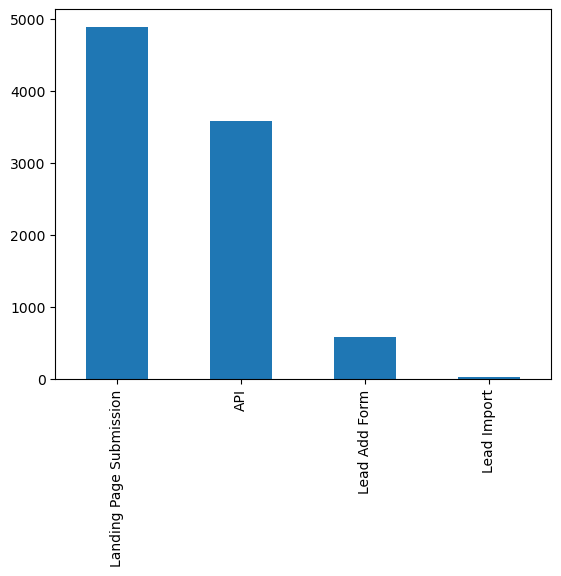

In [1378]:
#let's check Lead Origin column
leads['Lead Origin'].value_counts().plot.bar()

In [ ]:
### we can see above most of the leads comes from "Landing page submission" followed by "API"

<AxesSubplot:>

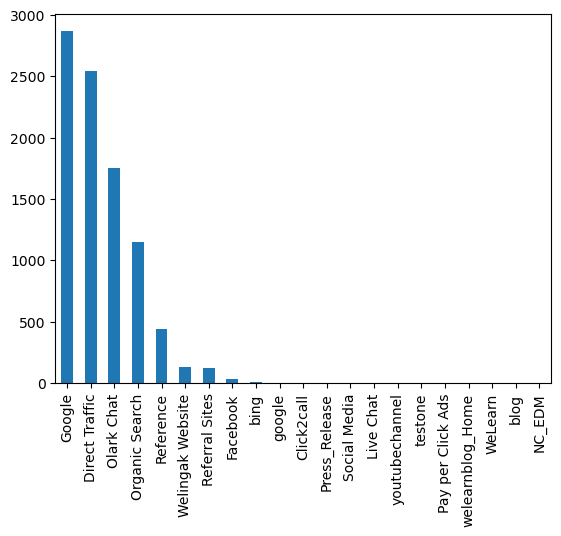

In [1379]:
leads['Lead Source'].value_counts().plot.bar()

In [1468]:
# we can there are two values as Google and google let's put both in one bin and there are also some categories
#like click2 call,press_Release, Social_media,  live chat till NC_EDM which came only one or twice time, we will create new bin as "Others"
#put all this in Others.

def bin(x):
    if x == 'google':
        return 'Google'
    elif x in ['Press_Release', 'Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads'
               ,'welearnblog_Home','WeLearn','blog','NC_EDM']:
        return 'Others'
    else:
        return x
leads['Lead Source']=leads['Lead Source'].apply(bin)


In [1469]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                13
bing                   6
Click2call             4
Name: Lead Source, dtype: int64

In [1380]:
### we can see most of lead coming from "Google" and also we can see there is 'Google' and 
#'google' we will make both as 'Google'

<AxesSubplot:>

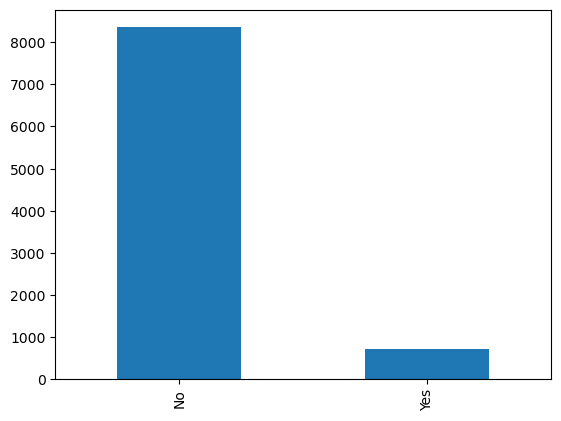

In [1381]:
#let's check Lead Origin column
leads['Do Not Email'].value_counts().plot.bar()

In [ ]:
## we can see above,most of the customers don't want to get email about courses from X

In [1383]:
#let's check Do Not Call column
leads['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [1384]:
# we can drop 'Do not Call' as there is no variationin values. it doesnt add any inofr mation in our analysis
leads=leads.drop("Do Not Call", axis=1)

In [1385]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:>

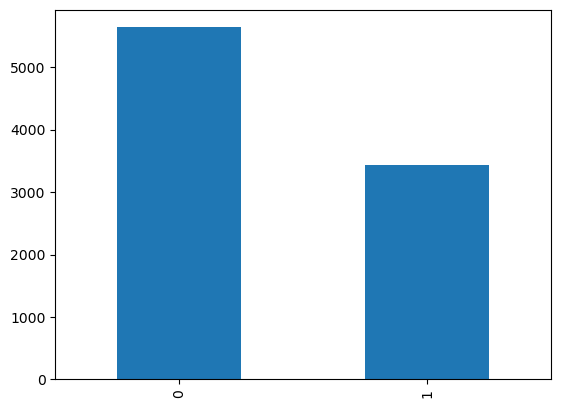

In [1386]:
#let's check Do Not Call column
leads['Converted'].value_counts().plot.bar()

In [1387]:
### we can see above, most of the lead are not successfully converted

<AxesSubplot:>

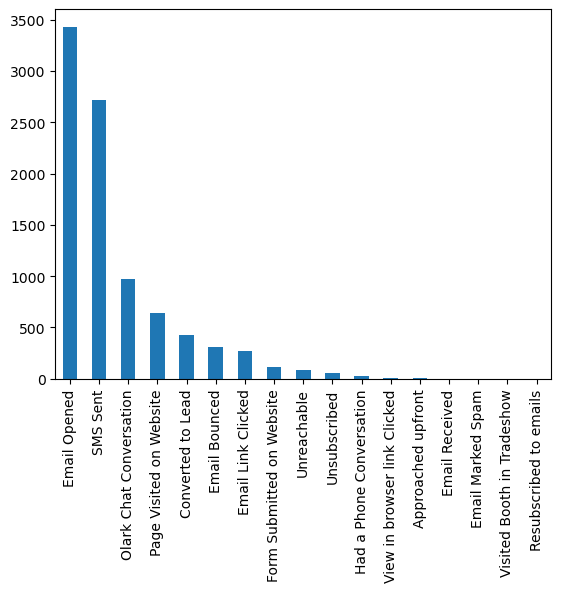

In [1388]:
#let's check Last Activity column
leads['Last Activity'].value_counts().plot.bar()

In [1471]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1472]:
## we can see there are some categories which come very few. we will bin those to "Others activity"
leads['Last Activity']=leads['Last Activity'].apply(lambda x: "Others Activity" if x in ['View in browser link Clicked','Approached upfront'
                                                                                        ,'Email Received','Email Marked Spam','Visited Booth in Tradeshow'
                                                                                        ,'Resubscribed to emails'] else x)


In [1473]:
leads['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Had a Phone Conversation       25
Others Activity                17
Name: Last Activity, dtype: int64

In [ ]:
## We can see above most of the leads has "Emai opened" as last activity and very few leads resubscribed to email

<AxesSubplot:>

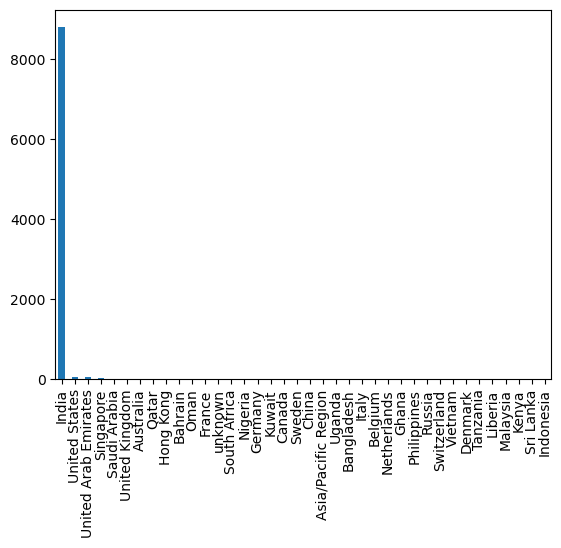

In [1389]:
#let's check Last Activity column
leads['Country'].value_counts().plot.bar()

In [ ]:
### we can above most of the leads are from India

<AxesSubplot:>

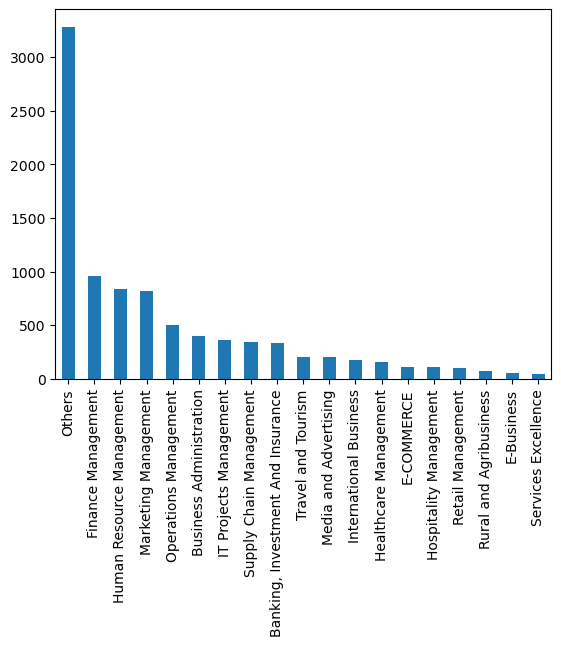

In [1390]:
#let's check Specialization column
leads['Specialization'].value_counts().plot.bar()

In [1391]:
## most of the leads are from Finance Management followed by HR Management and
# most of the leads have other specailization

<AxesSubplot:>

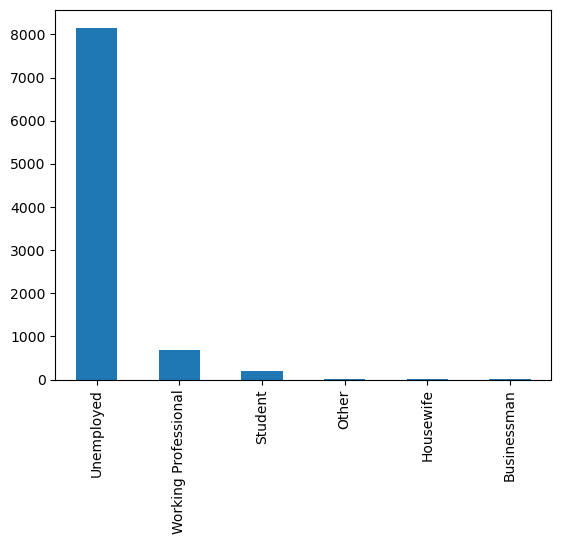

In [1392]:
#let's check Last Activity column
leads['What is your current occupation'].value_counts().plot.bar()

In [ ]:
#### most of the leads are unemployed followed by working professional

In [1394]:
#let's check What matters most to you in choosing a course column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1395]:
## we can see values are higly skewed. it's better to drop this column
leads = leads.drop("What matters most to you in choosing a course", axis=1)

In [1396]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Tags', 'Lead Quality',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1398]:
#let's check Last Activity column
leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [1399]:
### as we can see.Search having most of the values as "No"and it's not added any information tour analysis
### it's better to drop this column
leads=leads.drop("Search", axis=1)

In [1400]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1475]:
leads['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [1477]:
### let's put invalid number, wrong number given, number not provided in switched off category as all these values are similar
### also let's put data which comes very less in Others category
def binning(x):
    if x in ['invalid number','wrong number given','number not provided']:
        return 'switched off'
    elif x in ['Lost to Others','Still Thinking','Want to take admission but has financial problems',
               'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
              'University not recognized','Recognition issue (DEC approval)']:
        return 'Other Tags'
    else:
        return x
leads['Tags']=leads['Tags'].apply(binning)


<AxesSubplot:>

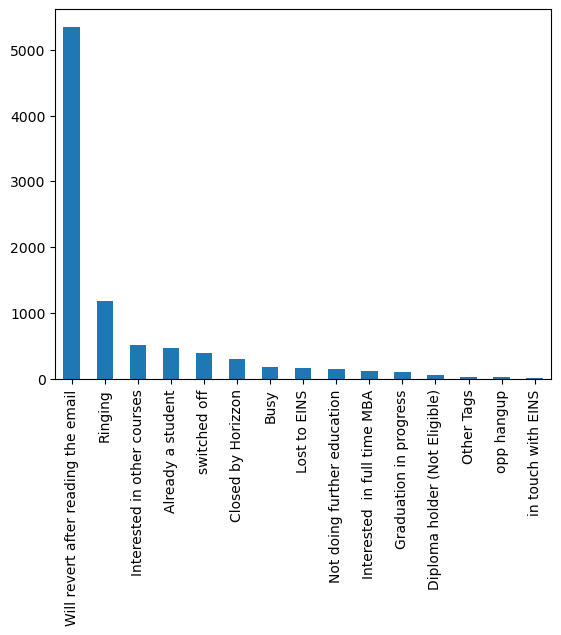

In [1478]:
#let's check Last Activity column
leads['Tags'].value_counts().plot.bar()

In [1479]:
leads['Tags'].value_counts()

Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
switched off                            395
Closed by Horizzon                      301
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Diploma holder (Not Eligible)            63
Other Tags                               37
opp hangup                               33
in touch with EINS                       12
Name: Tags, dtype: int64

In [1402]:
#### most of the leads have "will revert after reading the email" as current status

<AxesSubplot:>

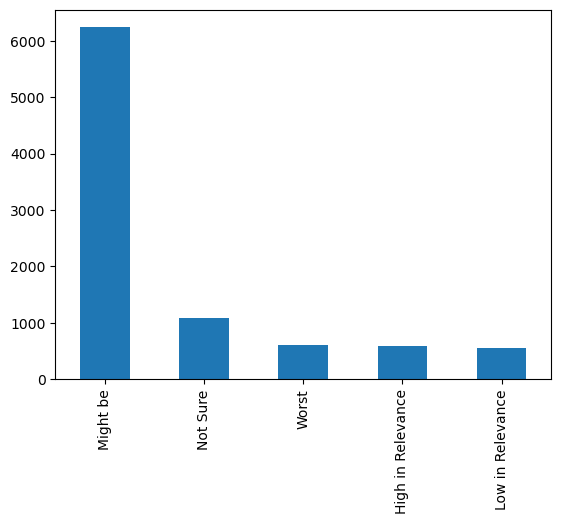

In [1403]:
#let's check Lead Quality column
leads['Lead Quality'].value_counts().plot.bar()

In [ ]:
### we can see above, most of the leads have the possibility to be converted


<AxesSubplot:>

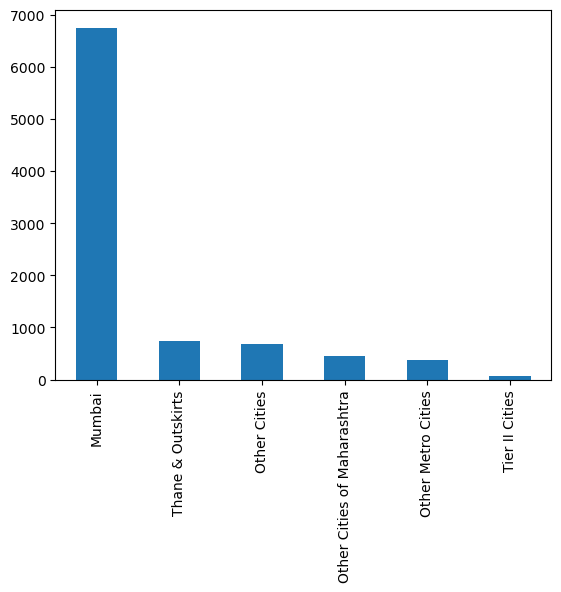

In [1404]:
#let's check City column
leads['City'].value_counts().plot.bar()

In [1405]:
### we can see, most of the leads are from Mumbai followed by Thane & outskirts

<AxesSubplot:>

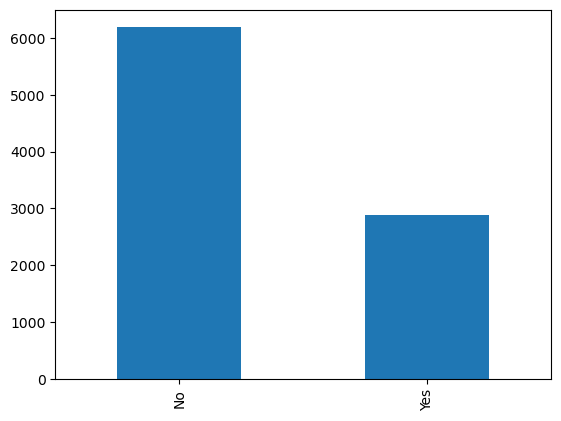

In [1406]:
#let's check A free copy of Mastering The Interview column
leads['A free copy of Mastering The Interview'].value_counts().plot.bar()

In [1407]:
### as we can above, most of the leads don't want to get a free copy of Mastering interview

In [1481]:
leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1482]:
### let put data in new bin 'Other Last Notable Activity' which comes very less.
def bin(x):
    if x in ['Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website'
            ,'Email Received']:
        return 'Other Last Notable Activity'
    else:
        return x
leads['Last Notable Activity']=leads['Last Notable Activity'].apply(bin)

<AxesSubplot:>

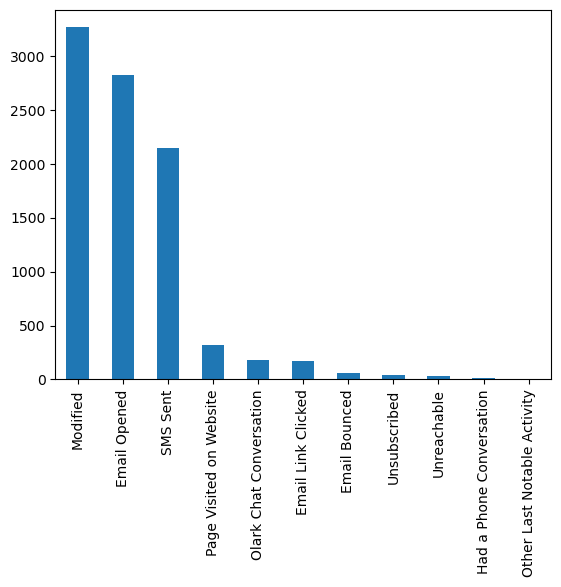

In [1483]:
#let's check A free copy of Mastering The Interview column
leads['Last Notable Activity'].value_counts().plot.bar()

In [1484]:
leads['Last Notable Activity'].value_counts()

Modified                       3267
Email Opened                   2823
SMS Sent                       2152
Page Visited on Website         318
Olark Chat Conversation         183
Email Link Clicked              173
Email Bounced                    60
Unsubscribed                     45
Unreachable                      32
Had a Phone Conversation         14
Other Last Notable Activity       7
Name: Last Notable Activity, dtype: int64

In [ ]:
### as we can see above, "Modified" activity is the most last notable activity of student

In [1409]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Bivariate analysis of columns with dependent variable

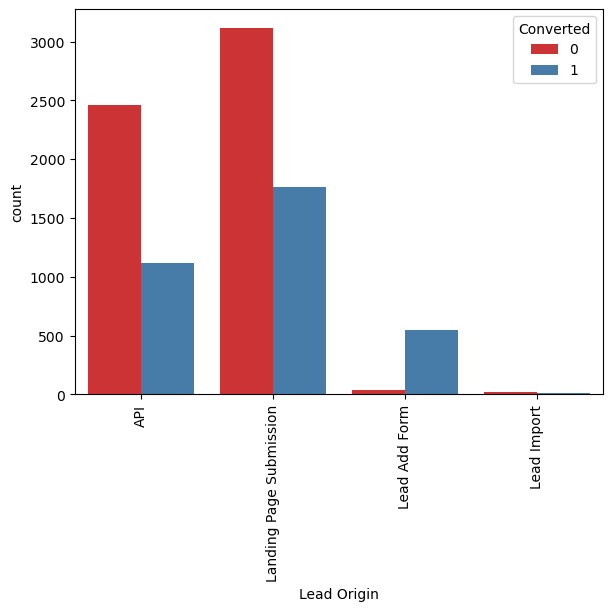

In [1432]:
# plot bar chart for Lead Origin with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Lead Origin', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Most of the leads whose origin from Land page submission are converted successfully followed by API and Lead Add Form

In [1485]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                13
bing                   6
Click2call             4
Name: Lead Source, dtype: int64

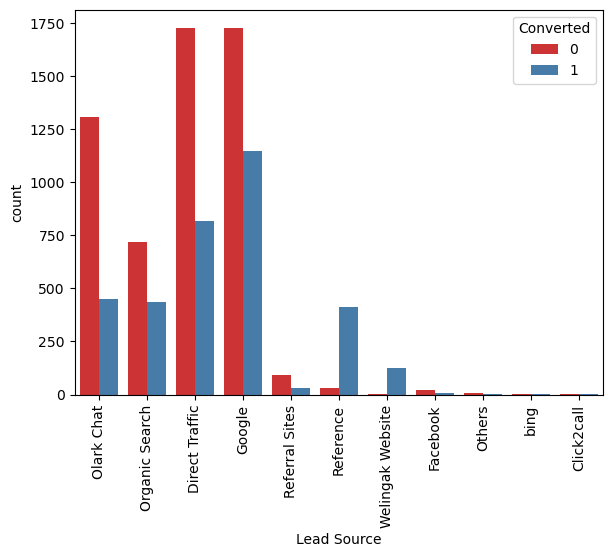

In [1486]:
# plot bar chart for Lead Origin with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Lead Source', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### As per above analysis, Reference & Welingak Website has highest conversion ratio in compare of Google as lead source

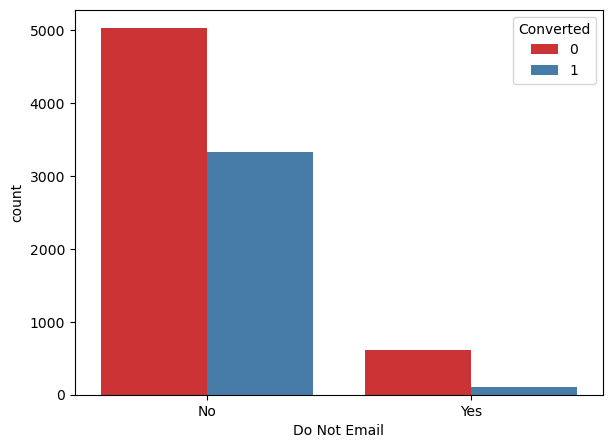

In [1487]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Do Not Email', palette='Set1')
plt.show()

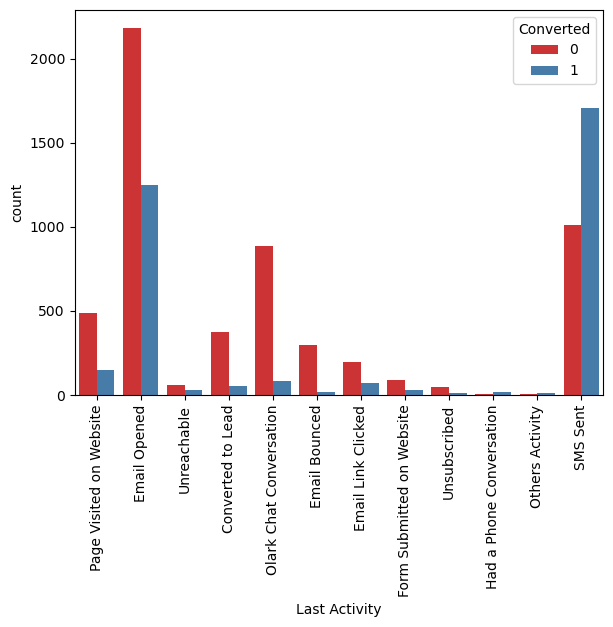

In [1488]:
# plot bar chart for Last Activity with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Last Activity', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#### leads who have SMS Sent as last activity are likely to be converted

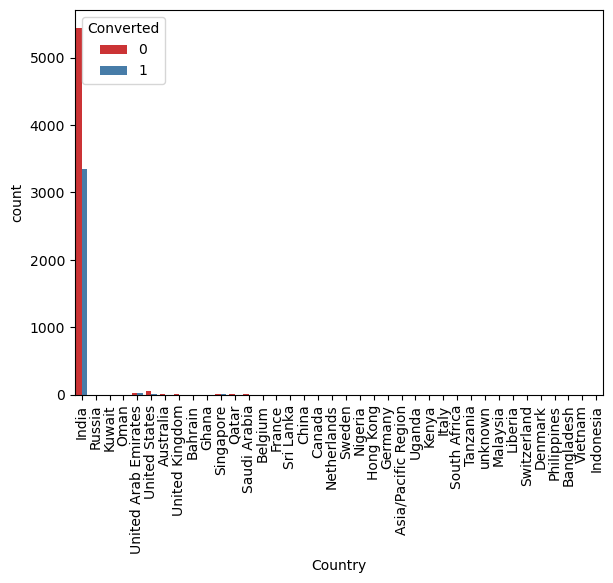

In [1489]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Country', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

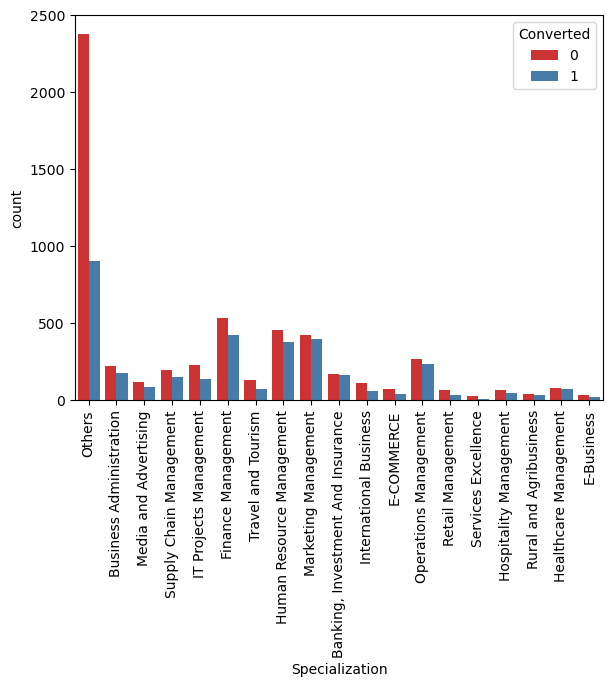

In [1490]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Specialization', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

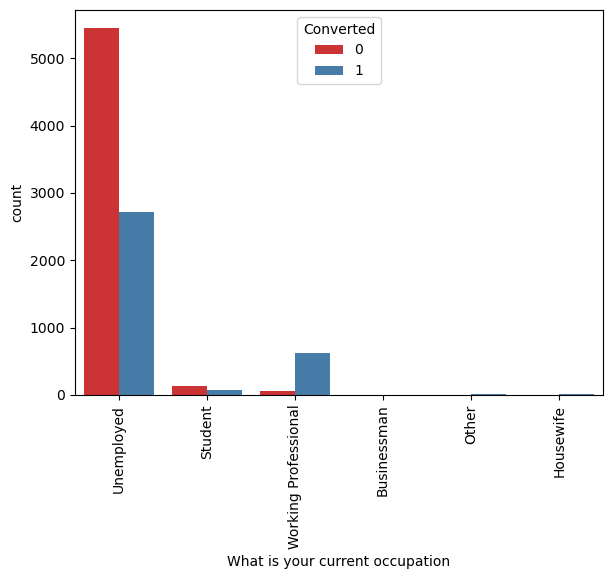

In [1491]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='What is your current occupation', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

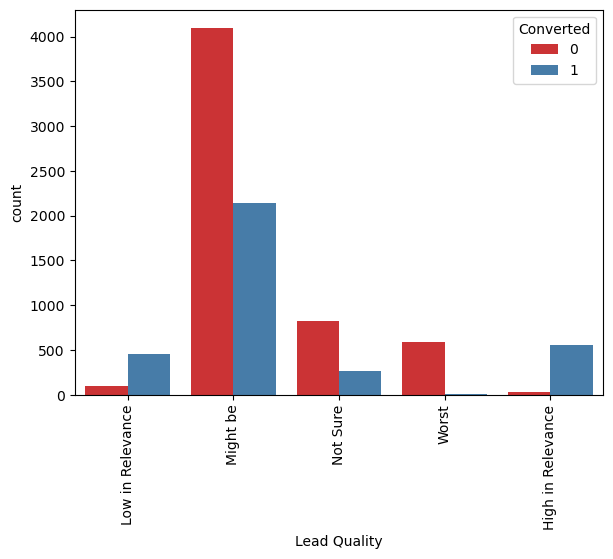

In [1492]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Lead Quality', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

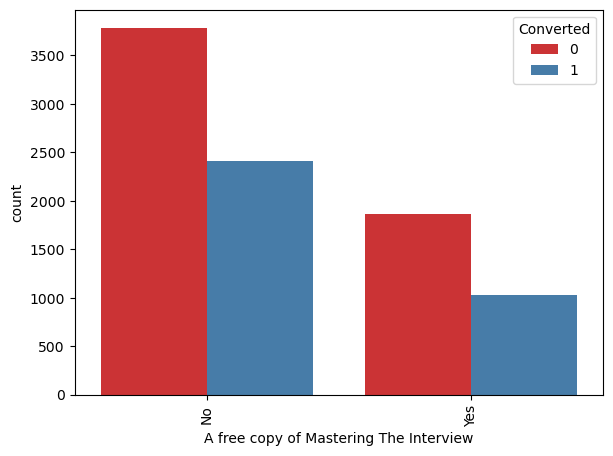

In [1493]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='A free copy of Mastering The Interview', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

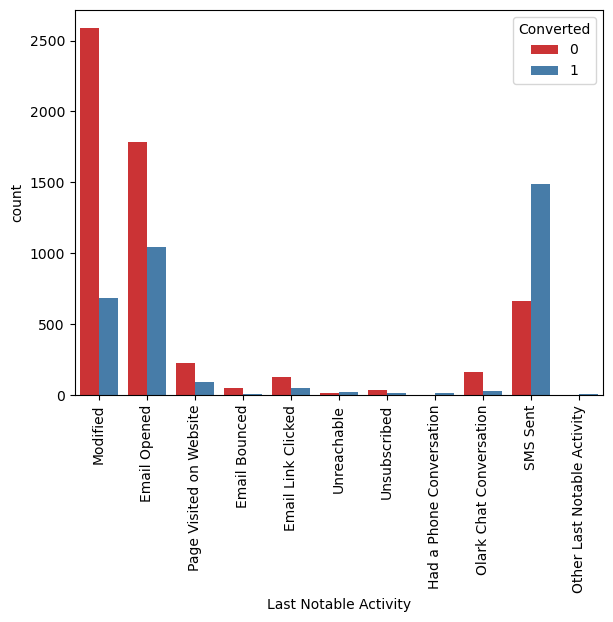

In [1494]:
# plot bar chart for Do Not Email with Target variable
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data= leads , hue='Converted' , x='Last Notable Activity', palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [1495]:
### bivariate analysis of numerical variable
numerical_var= ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [1496]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Country                                 9074 non-null   object 
 9   Specialization                          9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [1497]:
# lets's seggregate target varaible with converted and non_converted
leads_converted=leads[leads['Converted']==1]
leads_not_converted=leads[leads['Converted']==0]

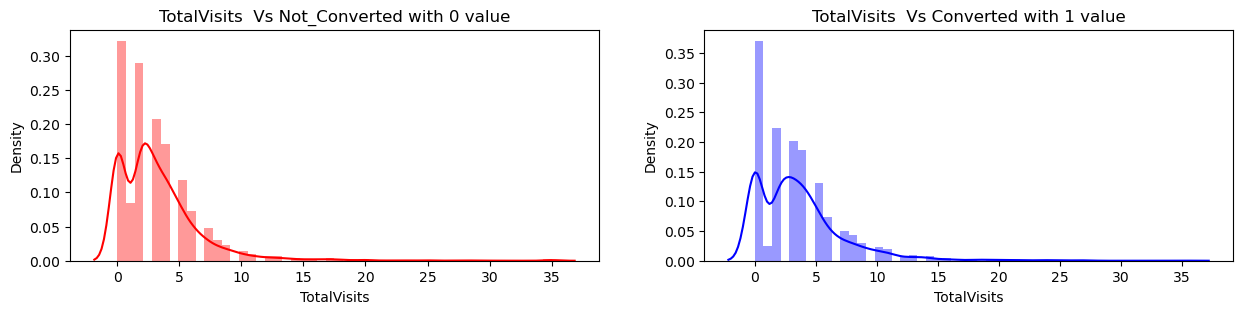

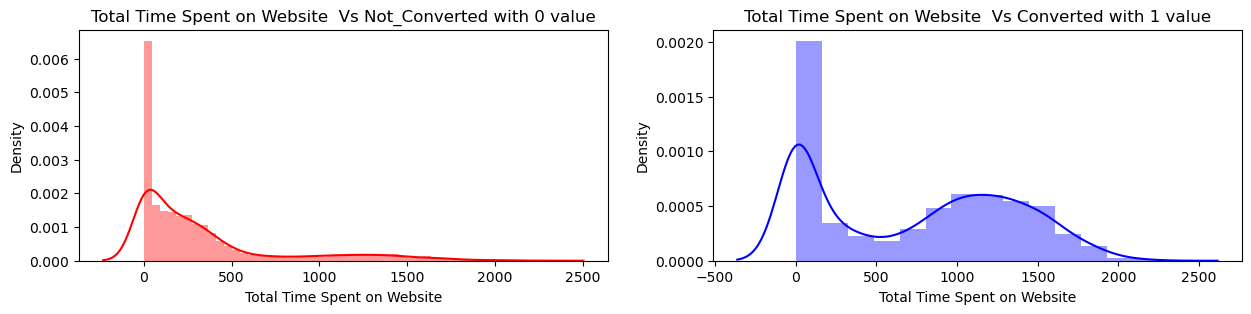

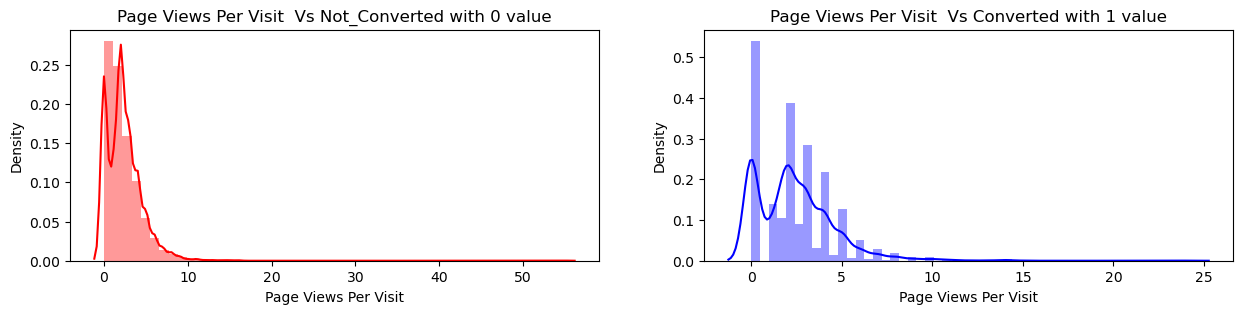

In [1498]:
#plot distribution plot for numerical variable using for loop
import warnings
warnings.filterwarnings('ignore')
for i in numerical_var: 
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    sns.distplot(leads_not_converted[i], color='r' )
    plt.title(i + "  Vs Not_Converted with 0 value")
    plt.subplot(122)
    sns.distplot(leads_converted[i], color='b')
    plt.title(i + "  Vs Converted with 1 value")
    plt.show()

In [1499]:
#### we can see above leads who send more time on website are likely to be successfully converted